<a href="https://colab.research.google.com/github/LichtLiu/NYCU_DL_Final/blob/main/NYCU_DL_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)

Mounted at /content/drive


## 1 - Packages

In [ ]:

import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import os, sys, copy
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## 2 - Load and Process the Dataset

In [ ]:
def load_kaggle_dataset():
    """
    Load and preprocess the Kaggle cats and dogs dataset based on the provided directory structure.

    Directory structure:
    - train/
        - cats/
        - dogs/
    - test/
        - cats/
        - dogs/

    Returns:
    train_set_x_orig -- training set features
    train_set_y -- training set labels
    test_set_x_orig -- test set features
    test_set_y -- test set labels
    classes -- list of classes
    """
    # Define base paths
    train_dir = '/content/drive/MyDrive/Colab Notebooks/NYCU-DP/train'
    test_dir = '/content/drive/MyDrive/Colab Notebooks/NYCU-DP/test'

    # Load training data
    train_images = []
    train_labels = []

    # Process training cat images (label 0)
    train_cats_dir = os.path.join(train_dir, 'cats')
    for file in os.listdir(train_cats_dir):
        try:
            img_path = os.path.join(train_cats_dir, file)
            # Open image, resize to 128x128, and convert to RGB
            img = Image.open(img_path).resize((128, 128)).convert('RGB')
            # Convert to numpy array and append to list
            img_array = np.array(img)
            train_images.append(img_array)
            train_labels.append(0)  # 0 for cats
        except Exception as e:
            print(f"Error processing {file}: {e}")

    # Process training dog images (label 1)
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    for file in os.listdir(train_dogs_dir):
        try:
            img_path = os.path.join(train_dogs_dir, file)
            # Open image, resize to 128x128, and convert to RGB
            img = Image.open(img_path).resize((128, 128)).convert('RGB')
            # Convert to numpy array and append to list
            img_array = np.array(img)
            train_images.append(img_array)
            train_labels.append(1)  # 1 for dogs
        except Exception as e:
            print(f"Error processing {file}: {e}")

    # Load test data
    test_images = []
    test_labels = []

    # Process test cat images (label 0)
    test_cats_dir = os.path.join(test_dir, 'cats')
    for file in os.listdir(test_cats_dir):
        try:
            img_path = os.path.join(test_cats_dir, file)
            # Open image, resize to 128x128, and convert to RGB
            img = Image.open(img_path).resize((128, 128)).convert('RGB')
            # Convert to numpy array and append to list
            img_array = np.array(img)
            test_images.append(img_array)
            test_labels.append(0)  # 0 for cats
        except Exception as e:
            print(f"Error processing {file}: {e}")

    # Process test dog images (label 1)
    test_dogs_dir = os.path.join(test_dir, 'dogs')
    for file in os.listdir(test_dogs_dir):
        try:
            img_path = os.path.join(test_dogs_dir, file)
            # Open image, resize to 128x128, and convert to RGB
            img = Image.open(img_path).resize((128, 128)).convert('RGB')
            # Convert to numpy array and append to list
            img_array = np.array(img)
            test_images.append(img_array)
            test_labels.append(1)  # 1 for dogs
        except Exception as e:
            print(f"Error processing {file}: {e}")

    # Convert lists to numpy arrays
    train_set_x_orig = np.array(train_images)
    train_set_y = np.array(train_labels).reshape(1, -1)  # Reshape to (1, m)

    test_set_x_orig = np.array(test_images)
    test_set_y = np.array(test_labels).reshape(1, -1)  # Reshape to (1, m)

    # Create classes array
    classes = np.array(['cat', 'dog'])

    # Print dataset information
    print("Number of training examples: m_train =", train_set_x_orig.shape[0])
    print("Number of testing examples: m_test =", test_set_x_orig.shape[0])
    print("Height/Width of each image: num_px =", train_set_x_orig.shape[1])
    print("Each image is of size:", train_set_x_orig.shape[1:])
    print("train_set_x shape:", train_set_x_orig.shape)
    print("train_set_y shape:", train_set_y.shape)
    print("test_set_x shape:", test_set_x_orig.shape)
    print("test_set_y shape:", test_set_y.shape)

    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes

In [ ]:


train_x_orig, train_y, test_x_orig, test_y, classes = load_kaggle_dataset()


Number of training examples: m_train = 557
Number of testing examples: m_test = 140
Height/Width of each image: num_px = 128
Each image is of size: (128, 128, 3)
train_set_x shape: (557, 128, 128, 3)
train_set_y shape: (1, 557)
test_set_x shape: (140, 128, 128, 3)
test_set_y shape: (1, 140)


y = 1. It's a dog picture.


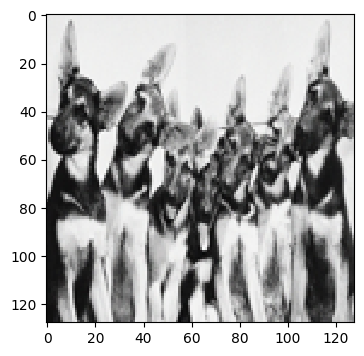

In [ ]:
# Example of a picture
index = 500
plt.imshow(train_x_orig[index])
# Save the plot to a file
plt.savefig('sample_image.png', dpi=300, bbox_inches='tight')
#plt.show()
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]]+  " picture.")

In [ ]:
# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

# Note: 49,152   equals  128×128×3 , which is the size of one reshaped image vector.

train_x's shape: (49152, 557)
test_x's shape: (49152, 140)


## 3 - Model Architecture

In [ ]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """

    A = 1/(1+np.exp(-Z))
    cache = Z

    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """

    A = np.maximum(0,Z)

    assert(A.shape == Z.shape)

    cache = Z
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.

    # When z <= 0, you should set dz to 0 as well.
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)

    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache

    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)

    assert (dZ.shape == Z.shape)

    return dZ


def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.seed(1)

    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))

    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters


def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))


    return parameters

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """

    Z = W.dot(A) + b

    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)

    assert(AL.shape == (1,X.shape[1]))

    return AL, caches

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())

    return cost

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    dA -- post-activation gradient for current layer l
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group

    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)

    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ...
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ...
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")

    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters -- python dictionary containing your updated parameters
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """

    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

    return parameters

def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    Returns:
    p -- predictions for the given dataset X
    """

    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))

    # Forward propagation
    probas, caches = L_model_forward(X, parameters)


    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))

    return p

def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]

        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


## 4 - Two-layer Neural Network

Cost after first iteration: 0.6932498480110872
Cost after iteration 0: 0.6932498480110872
Cost after iteration 100: 0.6910018543142787
Cost after iteration 200: 0.6784752976152673
Cost after iteration 300: 0.6407018964905616
Cost after iteration 400: 0.6283805960514515
Cost after iteration 500: 0.6162740252659502
Cost after iteration 600: 0.5973948693472123
Cost after iteration 700: 0.5781818700226428
Cost after iteration 800: 0.546850150111622
Cost after iteration 900: 0.5454434742588214
Cost after iteration 1000: 0.5051973285026223
Cost after iteration 1100: 0.7700472939322838
Cost after iteration 1200: 0.4996050460224465
Cost after iteration 1300: 0.4085017487970303
Cost after iteration 1400: 0.45666763241286906
Cost after iteration 1500: 1.0203017487479114
Cost after iteration 1600: 0.3314500388804655
Cost after iteration 1700: 0.2594447318444343
Cost after iteration 1800: 0.2890955290359641
Cost after iteration 1900: 0.43860878311858464
Cost after iteration 2000: 0.210579119842071

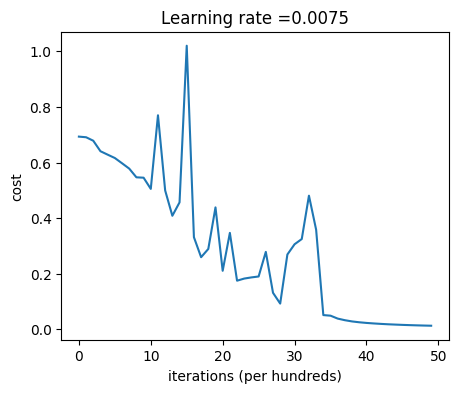

Accuracy: 1.0
Accuracy: 0.6214285714285714


In [ ]:

### CONSTANTS DEFINING THE MODEL ####
n_x = 49152    # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations

    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """

    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims

    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)


    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")

        # Compute cost
        cost = compute_cost(A2, Y)

        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")

        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)



        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]

        # Print the cost every 100 iterations and for the last iteration
        if print_cost and (i % 100 == 0 or i == num_iterations - 1):
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)

    return parameters, costs

def plot_costs(costs, learning_rate=0.01):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2, print_cost=False)

print("Cost after first iteration: " + str(costs[0]))

parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 5000, print_cost=True)
plot_costs(costs, learning_rate)

predictions_train = predict(train_x, train_y, parameters)

predictions_test = predict(test_x, test_y, parameters)

## 5 - L-layer Neural Network

In [ ]:
### CONSTANTS ###
#layers_dims = [49152, 20, 7, 5, 1] #  4-layer model
layers_dims = [49152, 32, 16, 1]

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, lambd=0.1):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    lambd -- L2 regularization can help prevent overfitting

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost

    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)

    # Implement dropout in your forward propagation
    keep_prob = 0.8  # 80% of neurons are kept

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)

        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)


        # Print the cost every 100 iterations and for the last iteration
        if print_cost and (i % 100 == 0 or i == num_iterations - 1):
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)

    return parameters, costs


In [ ]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 1, print_cost = False)

print("Cost after first iteration: " + str(costs[0]))

Cost after first iteration: 0.7008151996321373


In [ ]:
## 5.1 - Train the model
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 5000, print_cost = True)

In [ ]:

def plot_costs(costs, learning_rate=0.001):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

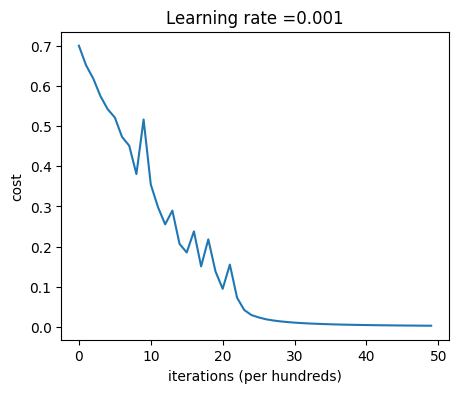

In [ ]:
plot_costs(costs, learning_rate=0.001)


In [ ]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [ ]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.5714285714285714


In [ ]:
## 5.1 - Train the model
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 3000, print_cost = True)

Cost after iteration 0: 0.7008151996321373
Cost after iteration 100: 0.6520134770367952
Cost after iteration 200: 0.6189177278304524
Cost after iteration 300: 0.5750919191491243
Cost after iteration 400: 0.5426551590478405
Cost after iteration 500: 0.5218623699275898
Cost after iteration 600: 0.4734622507277806
Cost after iteration 700: 0.4515707711450904
Cost after iteration 800: 0.38079579739798836
Cost after iteration 900: 0.5169233054822392
Cost after iteration 1000: 0.3548497429414573
Cost after iteration 1100: 0.298544275032204
Cost after iteration 1200: 0.25542706843686985
Cost after iteration 1300: 0.2897845090986447
Cost after iteration 1400: 0.2067941473229594
Cost after iteration 1500: 0.18531163664977965
Cost after iteration 1600: 0.2380259099265144
Cost after iteration 1700: 0.15072777823506003
Cost after iteration 1800: 0.21808815284151992
Cost after iteration 1900: 0.13818352083041552
Cost after iteration 2000: 0.09470172804729514
Cost after iteration 2100: 0.15506656027

In [ ]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [ ]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.5928571428571427


In [ ]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 1000, print_cost = True)

Cost after iteration 0: 0.7008151996321373
Cost after iteration 100: 0.6520134770367952
Cost after iteration 200: 0.6189177278304524
Cost after iteration 300: 0.5750919191491243
Cost after iteration 400: 0.5426551590478405
Cost after iteration 500: 0.5218623699275898
Cost after iteration 600: 0.4734622507277806
Cost after iteration 700: 0.4515707711450904
Cost after iteration 800: 0.38079579739798836
Cost after iteration 900: 0.5169233054822392
Cost after iteration 999: 0.3249091690031743


In [ ]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.8168761220825853


In [ ]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.55


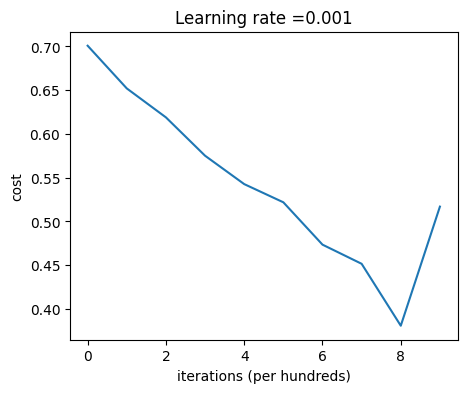

In [ ]:
plot_costs(costs, learning_rate=0.001)

In [ ]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 1500, print_cost = True)

Cost after iteration 0: 0.7008151996321373
Cost after iteration 100: 0.6520134770367952
Cost after iteration 200: 0.6189177278304524
Cost after iteration 300: 0.5750919191491243
Cost after iteration 400: 0.5426551590478405
Cost after iteration 500: 0.5218623699275898
Cost after iteration 600: 0.4734622507277806
Cost after iteration 700: 0.4515707711450904
Cost after iteration 800: 0.38079579739798836
Cost after iteration 900: 0.5169233054822392
Cost after iteration 1000: 0.3548497429414573
Cost after iteration 1100: 0.298544275032204
Cost after iteration 1200: 0.25542706843686985
Cost after iteration 1300: 0.2897845090986447
Cost after iteration 1400: 0.2067941473229594
Cost after iteration 1499: 0.224967106021405


In [ ]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9371633752244165


In [ ]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.5857142857142857


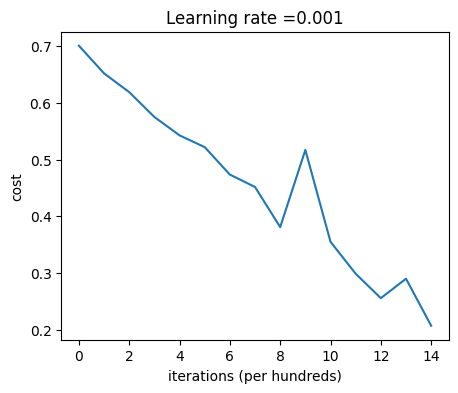

In [ ]:
plot_costs(costs, learning_rate=0.001)

In [ ]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2000, print_cost = True)

Cost after iteration 0: 0.7008151996321373
Cost after iteration 100: 0.6520134770367952
Cost after iteration 200: 0.6189177278304524
Cost after iteration 300: 0.5750919191491243
Cost after iteration 400: 0.5426551590478405
Cost after iteration 500: 0.5218623699275898
Cost after iteration 600: 0.4734622507277806
Cost after iteration 700: 0.4515707711450904
Cost after iteration 800: 0.38079579739798836
Cost after iteration 900: 0.5169233054822392
Cost after iteration 1000: 0.3548497429414573
Cost after iteration 1100: 0.298544275032204
Cost after iteration 1200: 0.25542706843686985
Cost after iteration 1300: 0.2897845090986447
Cost after iteration 1400: 0.2067941473229594
Cost after iteration 1500: 0.18531163664977965
Cost after iteration 1600: 0.2380259099265144
Cost after iteration 1700: 0.15072777823506003
Cost after iteration 1800: 0.21808815284151992
Cost after iteration 1900: 0.13818352083041552
Cost after iteration 1999: 0.09507444839843587


In [ ]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9802513464991024


In [ ]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.5642857142857143


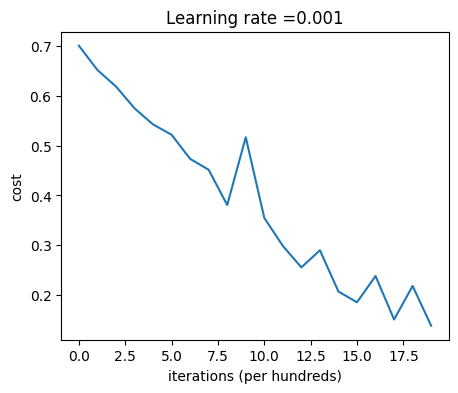

In [ ]:
plot_costs(costs, learning_rate=0.001)

In [ ]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.7008151996321373
Cost after iteration 100: 0.6520134770367952
Cost after iteration 200: 0.6189177278304524
Cost after iteration 300: 0.5750919191491243
Cost after iteration 400: 0.5426551590478405
Cost after iteration 500: 0.5218623699275898
Cost after iteration 600: 0.4734622507277806
Cost after iteration 700: 0.4515707711450904
Cost after iteration 800: 0.38079579739798836
Cost after iteration 900: 0.5169233054822392
Cost after iteration 1000: 0.3548497429414573
Cost after iteration 1100: 0.298544275032204
Cost after iteration 1200: 0.25542706843686985
Cost after iteration 1300: 0.2897845090986447
Cost after iteration 1400: 0.2067941473229594
Cost after iteration 1500: 0.18531163664977965
Cost after iteration 1600: 0.2380259099265144
Cost after iteration 1700: 0.15072777823506003
Cost after iteration 1800: 0.21808815284151992
Cost after iteration 1900: 0.13818352083041552
Cost after iteration 2000: 0.09470172804729514
Cost after iteration 2100: 0.15506656027

In [ ]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [ ]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.5928571428571427


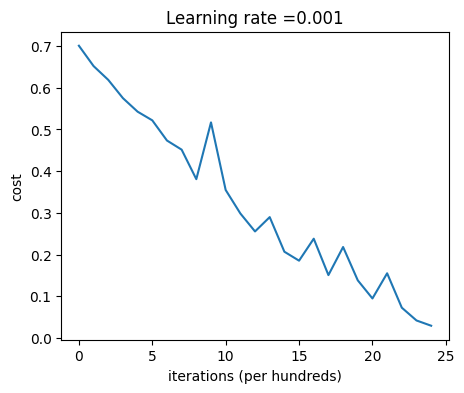

In [ ]:
plot_costs(costs, learning_rate=0.001)